In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from nuq.dup import NuqClassifierDup


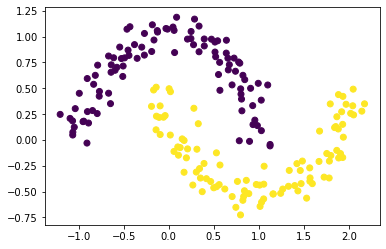

In [3]:
x, y = make_moons(200)
x += 0.1 * np.random.randn(200, 2)
plt.scatter(x[:, 0], x[:, 1], c=y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=40)

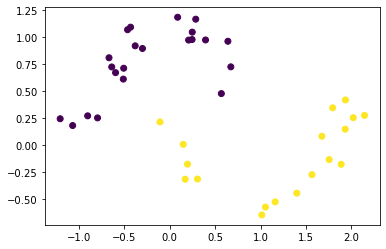

In [4]:
plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val)

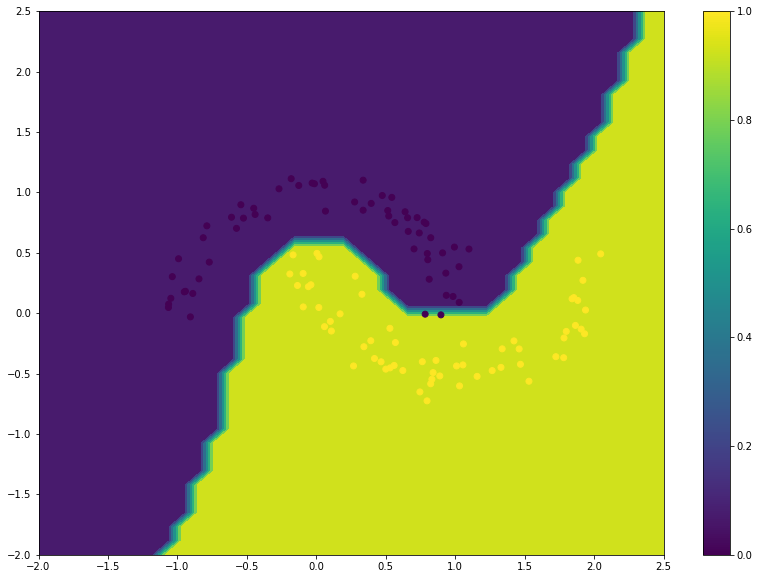

ValueError: cannot reshape array of size 1 into shape (40,40)

<Figure size 1008x720 with 0 Axes>

In [58]:
model = NuqClassifierDup(kernel_type='RBF')
model.fit(x_train, y_train)

fig_size = (14, 10)

x_mesh = np.array(np.meshgrid(np.linspace(-2, 2.5, 40), np.linspace(-2, 2.5, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)
prediction_mesh, _ = model.predict(x_mesh)
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()
plt.show()


model.kernel.gamma = 10
prediction_mesh, _ = model.predict(x_mesh)
prediction_mesh = prediction_mesh.max(axis=-1)
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()
plt.show()



<ipython-input-89-ddea0c6d3fd3>:20: RuntimeWarning: divide by zero encountered in log
  prediction_mesh = np.log(uncertainty)


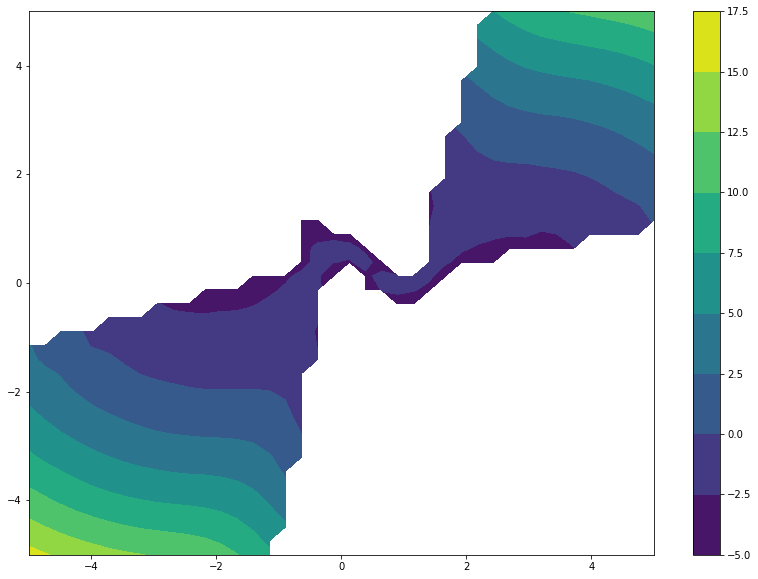

In [89]:
model = NuqClassifierDup(kernel_type='RBF', n_neighbors=20)
model.fit(x_train, y_train)


x_mesh = np.array(np.meshgrid(np.linspace(-5, 5, 40), np.linspace(-5, 5, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)

# model._update_bandwidth(0.5)

# _, uncertainty = model.predict_proba(x_mesh, 'aleatoric')
# prediction_mesh = uncertainty
# # prediction_mesh = prediction_mesh.max(axis=-1)
# plt.figure(figsize=fig_size)
# plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# plt.colorbar()
# plt.show()

_, uncertainty = model.predict_proba(x_mesh, 'epistemic')
prediction_mesh = np.log(uncertainty)
# prediction_mesh = prediction_mesh.max(axis=-1)
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()
plt.show()

In [88]:
prediction_mesh.reshape(40, 40)

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ..., -inf,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ..., -inf, -inf, -inf],
       [ nan,  nan,  nan, ..., -inf,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])